In [2]:
import sympy as sp

0.1*x0**3 + 0.5*x0*x1 + 0.1*x1**3 + 0.5*x1 + (x0 - 8)**2 + (x1 - 5)**2

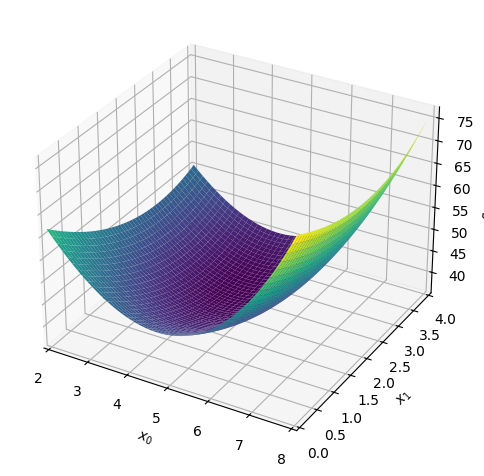

Gradient:  Matrix([[0.3*x0**2 + 2*x0 + 0.5*x1 - 16], [0.5*x0 + 0.3*x1**2 + 2*x1 - 9.5]])


NameError: name 'sol' is not defined

In [7]:
f = sp.Function('f')
variables = 2
x = sp.Matrix([0]*variables)
for i in range(variables):
    exec(f"x{i} = sp.symbols('x{i}')")
    x[i] = eval(f"x{i}")
#f = (x0**2 + x1**2)+sp.sin(x0)+sp.cos(x1)
#f = (1-x0)**2 + 100*(x1-x0**2)**2
f = (x0-8)**2 + (x1-5)**2 + x0*x1*0.5 + x1*0.5 + x0**3*0.1 + x1**3*0.1
#f = (x0-10)**2 + (x1-2)**2 + x0*x1 * sp.sin(x0*0.3) + sp.cos(x1*0.3*x0)
display(f)
# Plot the function
sp.plotting.plot3d(f, (x0, 2, 8), (x1, 0, 4))
# Lambda function
f_lambda = sp.lambdify(x, f, 'numpy')
fd_lambda = sp.lambdify(x, f.diff(x), 'numpy')
# Find fd=0
fd = sp.Matrix([f.diff(x[i]) for i in range(variables)])
print("Gradient: ", fd)
#sol = sp.solve(fd, x)
print("Solution: ", sol)
try:
    print("f(x) = ", f_lambda(*sol.values()))
    print("f'(x) = ", fd_lambda(*sol.values()).flatten())
except:
    print("Error printing solution")



In [ ]:
xMax = sp.symbols('xMax')
xMin = sp.symbols('xMin')
maxConstraints = sp.Matrix([0]*variables)
minConstraints = sp.Matrix([0]*variables)
for i in range(variables):
    exec(f"maxConstraints[{i}] = xMax - x{i}")
    exec(f"minConstraints[{i}] = x{i} - xMin")
g = sp.Matrix([maxConstraints, minConstraints])
display(g)
print(g)

Matrix([
[-x0 + xMax],
[-x1 + xMax],
[ x0 - xMin],
[ x1 - xMin]])

Matrix([[-x0 + xMax], [-x1 + xMax], [x0 - xMin], [x1 - xMin]])


In [ ]:
constraintsNum = len(g)
s = sp.Matrix([0]*constraintsNum)
l = sp.Matrix([0]*constraintsNum)
sln = sp.Matrix([0]*constraintsNum)
for i in range(constraintsNum):
    exec(f"s{i} = sp.symbols('s{i}')")
    s[i] = eval(f"s{i}")
    sln[i] = sp.ln(s[i])
    exec(f"l{i} = sp.symbols('l{i}')")
    l[i] = eval(f"l{i}")
mu = sp.symbols('mu')
# Unit vector
e = sp.Matrix([1]*constraintsNum)
lagrange = f - (mu * e.T * sln)[0] + ((g+s).T * l)[0]
display(lagrange)


l0*(s0 - x0 + xMax) + l1*(s1 - x1 + xMax) + l2*(s2 + x0 - xMin) + l3*(s3 + x1 - xMin) - mu*log(s0) - mu*log(s1) - mu*log(s2) - mu*log(s3) + 0.1*x0**3 + 0.5*x0*x1 + 0.1*x1**3 + 0.5*x1 + (x0 - 8)**2 + (x1 - 5)**2

In [ ]:
# Compute the gradient of the lagrange function
grad = sp.Matrix([lagrange.diff(i) for i in x])
display(grad)
# Compute the hessian of the lagrange function
hess = sp.Matrix([[lagrange.diff(i1, i2) for i1 in x] for i2 in x])
display(hess)

Matrix([
[ -l0 + l2 + 0.3*x0**2 + 2*x0 + 0.5*x1 - 16],
[-l1 + l3 + 0.5*x0 + 0.3*x1**2 + 2*x1 - 9.5]])

Matrix([
[0.6*x0 + 2,        0.5],
[       0.5, 0.6*x1 + 2]])

In [ ]:
# Compute jacobian of g
jacob = sp.Matrix([[g[i].diff(x[j]) for j in range(variables)] for i in range(constraintsNum)])
display(jacob)

Matrix([
[-1,  0],
[ 0, -1],
[ 1,  0],
[ 0,  1]])

In [ ]:
# Diagonal matrix
S = sp.diag(*s)
Ep = sp.diag(*l)
I = sp.eye(constraintsNum)

In [ ]:
A = sp.zeros(variables+constraintsNum*2, variables+constraintsNum*2)
A[:variables, :variables] = hess
A[:variables, variables:variables+constraintsNum] = jacob.T
A[variables:variables+constraintsNum, :variables] = jacob
A[variables:variables+constraintsNum, variables+constraintsNum:variables+constraintsNum*2] = sp.eye(constraintsNum)
A[variables+constraintsNum:variables+constraintsNum*2, variables:variables+constraintsNum] = sp.eye(constraintsNum)
A[variables+constraintsNum:variables+constraintsNum*2, variables+constraintsNum:variables+constraintsNum*2] = S.inv()*Ep

display(A)

Matrix([
[0.6*x0 + 2,        0.5, -1,  0, 1, 0,     0,     0,     0,     0],
[       0.5, 0.6*x1 + 2,  0, -1, 0, 1,     0,     0,     0,     0],
[        -1,          0,  0,  0, 0, 0,     1,     0,     0,     0],
[         0,         -1,  0,  0, 0, 0,     0,     1,     0,     0],
[         1,          0,  0,  0, 0, 0,     0,     0,     1,     0],
[         0,          1,  0,  0, 0, 0,     0,     0,     0,     1],
[         0,          0,  1,  0, 0, 0, l0/s0,     0,     0,     0],
[         0,          0,  0,  1, 0, 0,     0, l1/s1,     0,     0],
[         0,          0,  0,  0, 1, 0,     0,     0, l2/s2,     0],
[         0,          0,  0,  0, 0, 1,     0,     0,     0, l3/s3]])

In [ ]:
b = sp.zeros(variables+constraintsNum*2, 1)
b[:variables, 0] = grad
b[variables:variables+constraintsNum, 0] = g+s
b[variables+constraintsNum:variables+constraintsNum*2, 0] = l-mu*S.inv()*e
display(b)

Matrix([
[ -l0 + l2 + 0.3*x0**2 + 2*x0 + 0.5*x1 - 16],
[-l1 + l3 + 0.5*x0 + 0.3*x1**2 + 2*x1 - 9.5],
[                            s0 - x0 + xMax],
[                            s1 - x1 + xMax],
[                            s2 + x0 - xMin],
[                            s3 + x1 - xMin],
[                                l0 - mu/s0],
[                                l1 - mu/s1],
[                                l2 - mu/s2],
[                                l3 - mu/s3]])

In [ ]:
# Make A and b to functions
A_func = sp.lambdify([*x, *s, *l, mu, xMax, xMin], A)
b_func = sp.lambdify([*x, *s, *l, mu, xMax, xMin], b)

In [ ]:
import numpy as np

In [ ]:
# Test  
test_array = [1]*(variables+constraintsNum*2+3)
A_test = A_func(*test_array)
b_test = b_func(*test_array)
print(A_test)
print(b_test)

[[ 2.6  0.5 -1.   0.   1.   0.   0.   0.   0.   0. ]
 [ 0.5  2.6  0.  -1.   0.   1.   0.   0.   0.   0. ]
 [-1.   0.   0.   0.   0.   0.   1.   0.   0.   0. ]
 [ 0.  -1.   0.   0.   0.   0.   0.   1.   0.   0. ]
 [ 1.   0.   0.   0.   0.   0.   0.   0.   1.   0. ]
 [ 0.   1.   0.   0.   0.   0.   0.   0.   0.   1. ]
 [ 0.   0.   1.   0.   0.   0.   1.   0.   0.   0. ]
 [ 0.   0.   0.   1.   0.   0.   0.   1.   0.   0. ]
 [ 0.   0.   0.   0.   1.   0.   0.   0.   1.   0. ]
 [ 0.   0.   0.   0.   0.   1.   0.   0.   0.   1. ]]
[[-13.2]
 [ -6.7]
 [  1. ]
 [  1. ]
 [  1. ]
 [  1. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]]


In [ ]:
def newtonSolver(initial, constraints, mu):
    x, s, l = initial[:variables], initial[variables:variables+constraintsNum], initial[variables+constraintsNum:]
    xMax, xMin = constraints
    state = np.concatenate([x, s, l, [mu, xMax, xMin]])
    A = A_func(*state)
    b = b_func(*state)
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    step = np.linalg.solve(A, -b)
    return step, A, b

def IPM(x, constraints, max_iter=20, tol=1e-4):
    x = np.array(x, dtype=float)
    mu = 1
    for i in range(max_iter):
        # Add randomness to x
        #x += np.random.randn(len(x))*tol
        
        # Newton's method
        step, A, b = newtonSolver(x, constraints, mu)   
        
        # Max step size for design variables
        aMax = 1
        for j in range(constraintsNum):
            a = (0.005-1)*x[variables+constraintsNum+j]/step[variables+constraintsNum+j]
            a = a[0]
            #print(f"{a} {x[variables+constraintsNum+j]} {step[variables+constraintsNum+j]}")
            if a > 0:
                aMax = min(aMax, a)
        aDesign = aMax

        # Line search
        ak = aDesign
        cost = f_lambda(*x[:variables])
        newCost = f_lambda(*(x[:variables]+step.reshape(-1)[:variables]*ak))
        while newCost > cost + 1e-4*ak*(fd_lambda(*x[:variables]).T @ step[:variables]):
            ak *= 0.9
            newCost = f_lambda(*(x[:variables]+step.reshape(-1)[:variables]*ak))

        # Max step size for design variables
        aMax = 1
        for j in range(constraintsNum):
            a = (0.005-1)*x[variables+j]/step[variables+j]
            a = a[0]
            #print(f"{a} {x[variables+j]} {step[variables+j]}")
            if a > 0:
                aMax = min(aMax, a)
        aLagrange = aMax

        # Rescale step
        step = step.reshape(-1)
        step[:variables] = step[:variables]*ak # Design variables
        step[variables:variables+constraintsNum] = step[variables:variables+constraintsNum]*aLagrange # Lagrange multipliers
        step[variables+constraintsNum:] = step[variables+constraintsNum:]*ak # Slack variables
        # Update x
        x += step        

        # Check if max step size is too small (Kinda wierd fix) 
        # aLagrange
        if aLagrange < tol:
            print('Step size too small', end=': ')
            print(f"aLagrange = {aLagrange}, tol = {tol}")
            x[variables:variables+constraintsNum] = [0.01]*constraintsNum
        # ak
        if ak < tol:
            print('Step size too small', end=': ')
            print(f"ak = {ak}, tol = {tol}, aDesign = {aDesign}")
            x[variables+constraintsNum:] = [0.01]*constraintsNum

        # Check convergence
        tolCurrent = np.linalg.norm(fd_lambda(*x[:variables]))
        print(f'Iteration {i+1}, tol = {np.round(tolCurrent, 3)}, mu = {np.round(mu, 2)}, ak = {np.round(ak, 3)}, al = {np.round(aLagrange, 3)}, ad = {aDesign}, x = {np.round(x[:variables], 2)}, cost = {np.round(f_lambda(*x[:variables]), 2)}')
        if tolCurrent < tol:
            print('Converged')
            return x
        # Update mu
        mu *= 0.7
    return x

# design variables, lagrange multipliers, and slack variables
x = [*[5]*variables, *[1]*constraintsNum, *[0.01]*constraintsNum]
constraints = [-1, 10]
result = IPM(x, constraints)
print(result)

Iteration 1, tol = 1.277, mu = 1, ak = 1, al = 1, ad = 1, x = [4.4  2.97], cost = 36.23
Step size too small: ak = 4.76327279526382e-15, tol = 0.0001, aDesign = 1
Iteration 2, tol = 1.277, mu = 0.7, ak = 0.0, al = 0.111, ad = 1, x = [4.4  2.97], cost = 36.23
Iteration 3, tol = 1.224, mu = 0.49, ak = 0.002, al = 1, ad = 0.0015345265866945842, x = [4.4  2.95], cost = 36.22
Iteration 4, tol = 1.222, mu = 0.34, ak = 0.001, al = 1, ad = 0.0013067184280057896, x = [4.41 2.95], cost = 36.22
Step size too small: ak = 7.328831722316047e-06, tol = 0.0001, aDesign = 7.328831722316047e-06
Iteration 5, tol = 1.222, mu = 0.24, ak = 0.0, al = 1, ad = 7.328831722316047e-06, x = [4.41 2.95], cost = 36.22
Iteration 6, tol = 1.221, mu = 0.17, ak = 0.0, al = 1, ad = 0.0003686421170045253, x = [4.41 2.95], cost = 36.21
Iteration 7, tol = 0.076, mu = 0.12, ak = 1, al = 1, ad = 1, x = [4.42 2.64], cost = 36.02
Step size too small: ak = 8.962938115922215e-15, tol = 0.0001, aDesign = 1
Iteration 8, tol = 0.075,